In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [5]:
#Loading the data
data=pd.read_excel('/content/iris (1).xls')

Understanding the data

In [6]:
data.shape

(150, 5)

In [7]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


There is no missing values. Four nuemeric columns and one object type data

In [9]:
data.Classification.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
data.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The classification column is selected as target variable and is an object data. So we are using label encoding for the column classification.

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Classification']=le.fit_transform(data['Classification'])

In [12]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Plotting histograms to understand the distribution of data

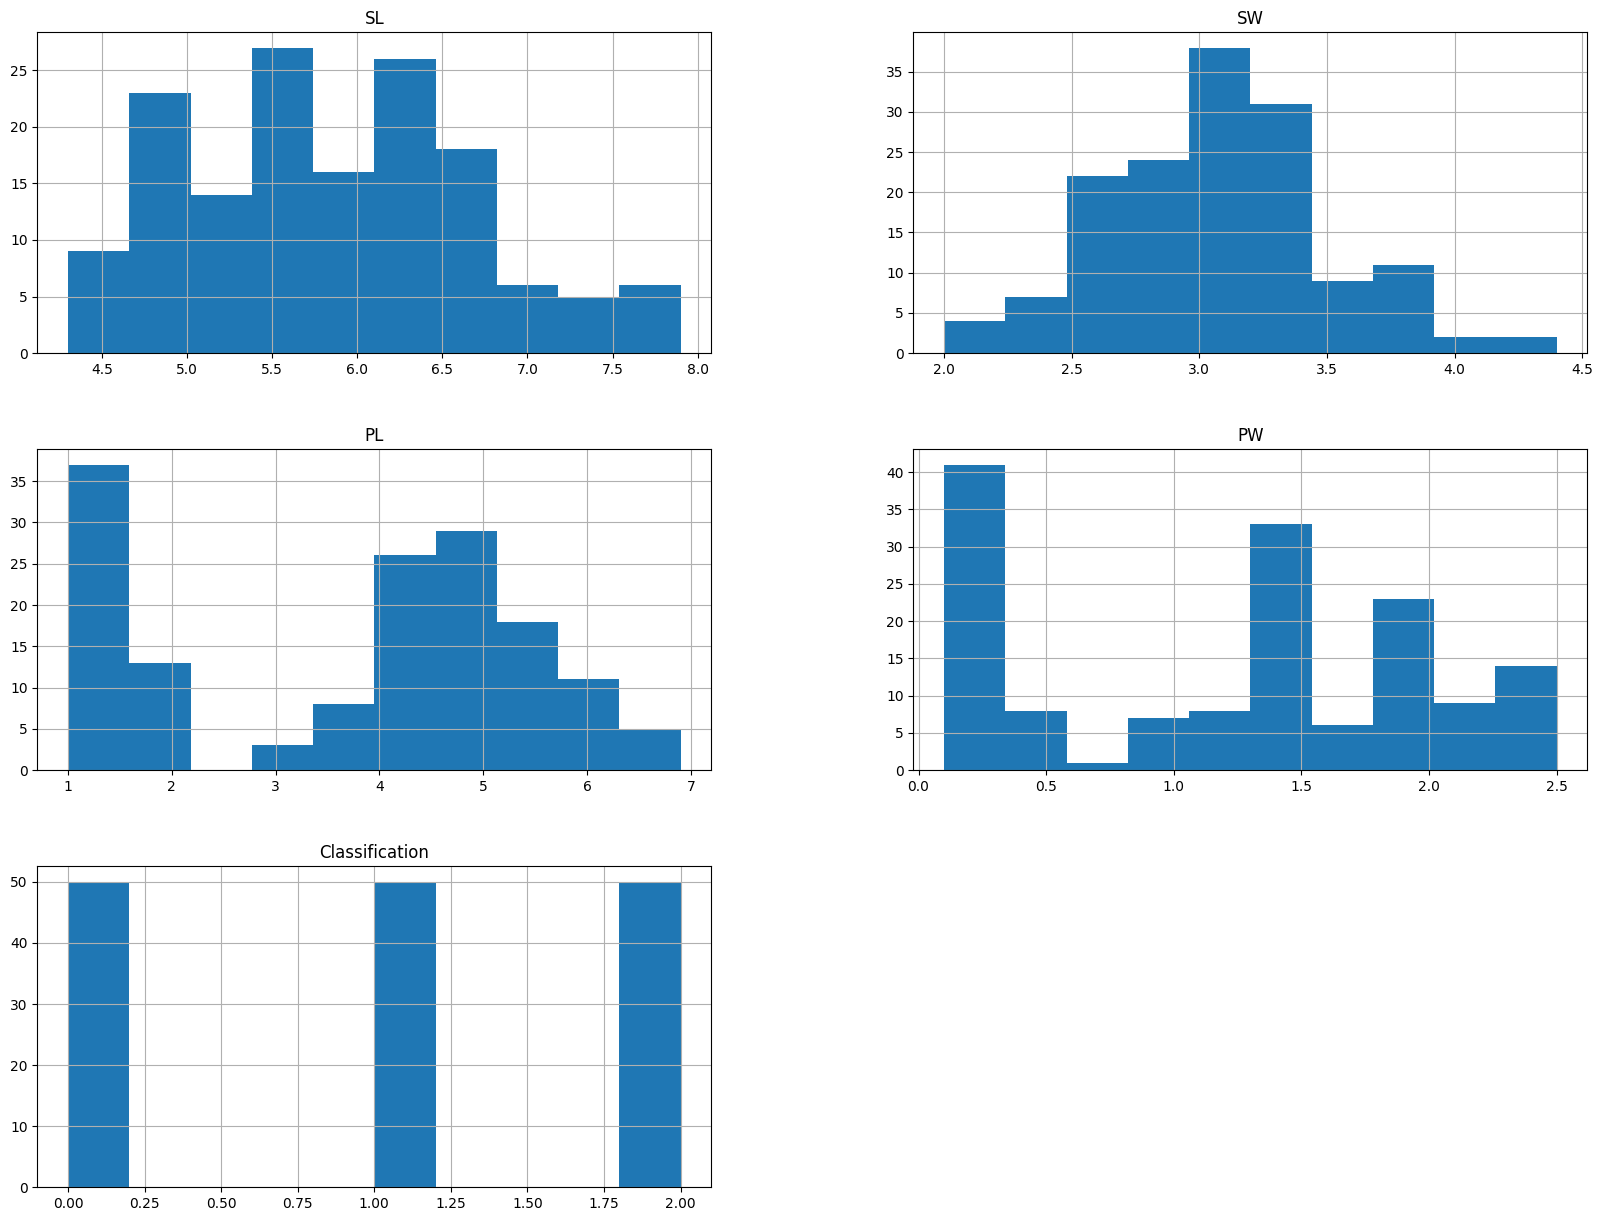

In [14]:
freqgraph=data.select_dtypes(include=['int32','int64','float'])
freqgraph.hist(figsize=(20,15))
plt.show()

Finding the corrlation matrix

<Axes: >

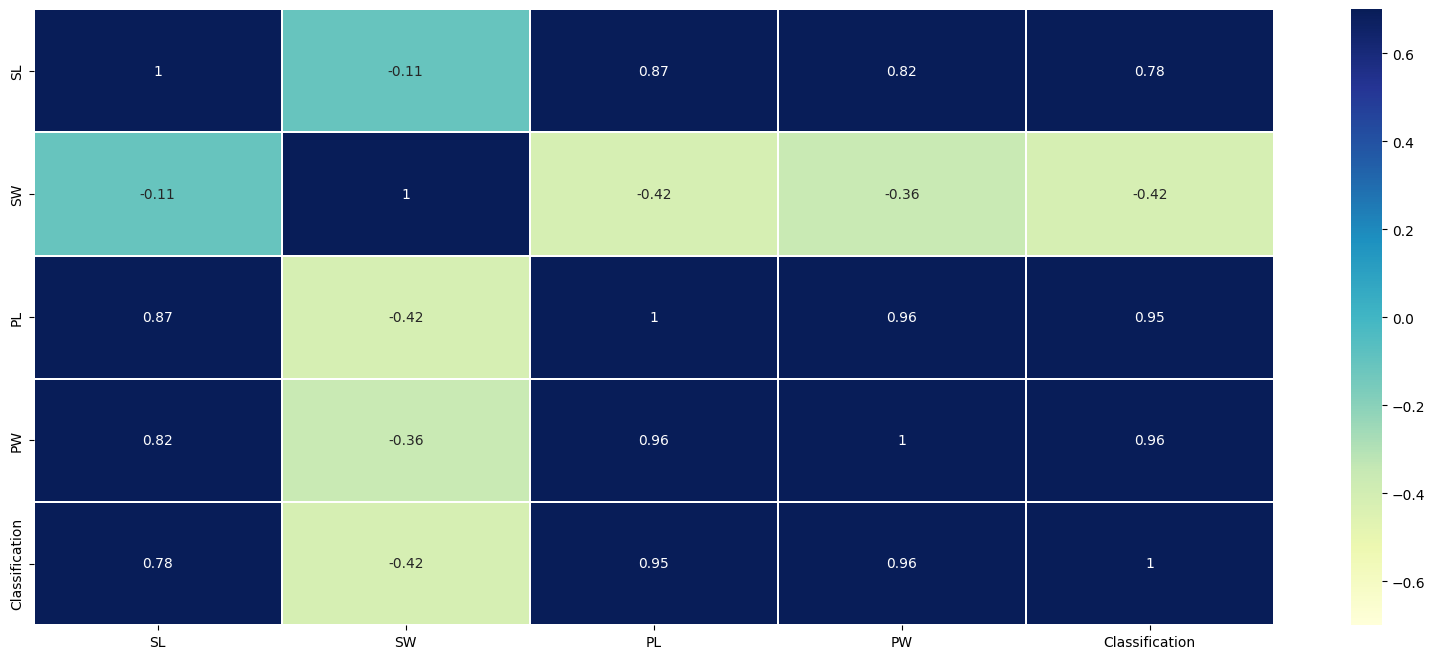

In [23]:
cormatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(cormatrix,vmin=-0.7,vmax=0.7,annot=True,linewidths=0.2,cmap='YlGnBu')

All the independant variables are highly correlated with the target variable classification.  So we are not droping any  of the variables.

In [16]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

Linear modeling

In [17]:
y=data['Classification']
x=data.drop(['Classification'],axis=1)

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [19]:
from sklearn import linear_model
lr=linear_model.LinearRegression()

Training the model

In [20]:
model=lr.fit(x_train,y_train)

Testing the model

In [21]:
predictions=model.predict(x_test)
predictions

array([ 1.23854678, -0.04119248,  2.23057994,  1.34935367,  1.29151089,
        0.01594281,  1.05143521,  1.81640073,  1.36775411,  1.06705103,
        1.69745222, -0.07762165, -0.15941036, -0.06834459, -0.02636934,
        1.39766768,  1.99935337,  1.04855955,  1.28355776,  1.96953084,
        0.02746233,  1.59598561,  0.08741006,  1.91680619,  1.84772284,
        1.87117936,  1.79515885,  2.03297009,  0.02782765,  0.0220421 ,
       -0.14302383, -0.07634418,  1.1796602 ,  0.00449757, -0.01791338,
        1.68180798,  1.28673552, -0.07281786])

In [ ]:
#Checking the mse value to check how good the model is

In [22]:
from sklearn.metrics import mean_squared_error
print("MSE is: ",mean_squared_error(y_test,predictions))

MSE is:  0.036200392900822484


In [ ]:
#The value should be close to zero, here it is 0.0362 is good, so we can conclude the model is good

In [24]:
from sklearn.metrics import r2_score
print('R2 score is :', r2_score(y_test,predictions))

R2 score is : 0.9486004254190878


R2 coefficient is claose 1 . We can conclude the model is good